<a href="https://colab.research.google.com/github/Boshra-01/Rust-IR-BERT/blob/main/Rust_RustML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import json
NB_PATH="/content/drive/MyDrive/Colab Notebooks/Rust - RustML.ipynb"
print("Cleaning widgets metadata in:",NB_PATH)
with open(NB_PATH,'r',encoding='utf-8') as f:
    nb=json.load(f)
def scrub(o):
    if isinstance(o,dict):
        o.pop('widgets',None)
        for v in o.values():scrub(v)
    elif isinstance(o,list):
        for i in o:scrub(i)
scrub(nb)
with open(NB_PATH,'w',encoding='utf-8') as f:
    json.dump(nb,f,indent=1)
print("Done")

Cleaning widgets metadata in: /content/drive/MyDrive/Colab Notebooks/Rust - RustML.ipynb
Done


Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 24.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/539 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at microsoft/graphcodebert-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Embeddings shape: (1849, 768), vulnerable: 396, safe: 1453
Optimal threshold: 0.13 (F1=0.6606)
Test Accuracy: 0.8
              precision    recall  f1-score   support

           0     0.9780    0.7629    0.8571       291
           1     0.5175    0.9367    0.6667        79

    accuracy                         0.8000       370
   macro avg     0.7477    0.8498    0.7619       370
weighted avg     0.8797    0.8000    0.8165       370



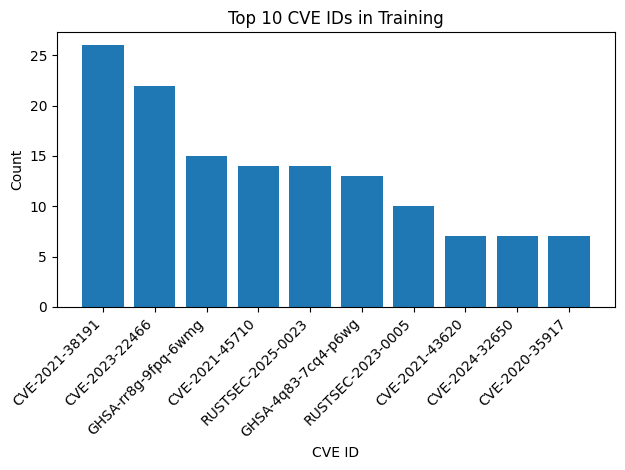

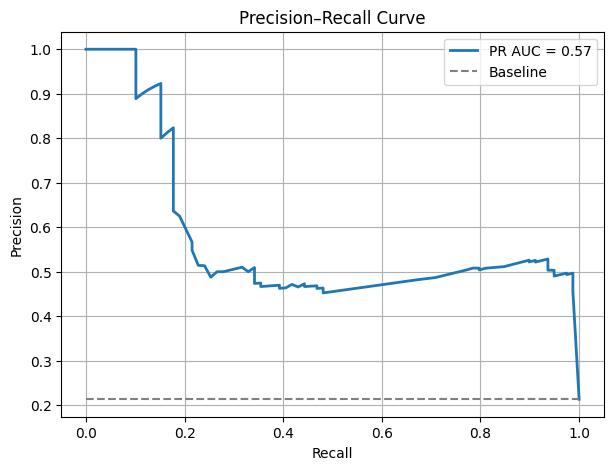

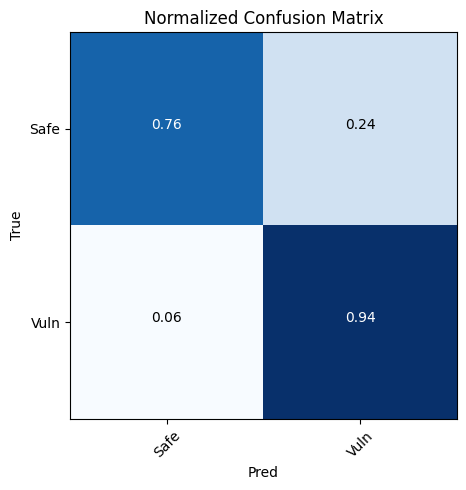

Upload a new .rs file for inference:


Saving macros.rs to macros.rs
**VULNERABLE** (p=0.27)
Assigned CVE: CVE-2021-38191


In [ ]:
from google.colab import drive, files
drive.mount('/content/drive')
!unzip -q "/content/drive/MyDrive/Colab Notebooks/Rust/snippet4.zip" -d /content/

!pip install transformers torch pandas scikit-learn catboost

import os, re, torch, pandas as pd, numpy as np
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report,
    precision_recall_curve, auc, f1_score, confusion_matrix
)
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load & Normalize Labels CSV for .rs
csv_path = "/content/snippet4/label4.csv"
df = pd.read_csv(csv_path)

# 'file_path' column contains relative paths to .rs files under snippet4/
df['filename'] = df['file_path'].str.replace('\\','/').apply(os.path.basename)
df['is_vuln']  = df['filename'].str.endswith("_v.rs").astype(int)
df['rs_fullpath'] = df['file_path'].apply(lambda p: os.path.join("/content/snippet4", p.replace('\\','/')))


def salvage(fn):
    for root, _, files in os.walk("/content/snippet4"):
        if fn in files:
            return os.path.join(root, fn)
    return None

df['exists'] = df['rs_fullpath'].apply(os.path.exists)
for idx, row in df[~df['exists']].iterrows():
    alt = salvage(row['filename'])
    if alt:
        df.at[idx, 'rs_fullpath'] = alt
        df.at[idx, 'exists'] = True
df = df[df['exists']].reset_index(drop=True)


def load_and_clean_rs(path):
    with open(path, 'r', encoding='utf-8', errors='ignore') as f:
        text = f.read()
    # remove line comments and block comments
    text = re.sub(r'//.*', '', text)
    text = re.sub(r'/\*.*?\*/', '', text, flags=re.S)
    return text

#Initialize GraphCodeBERT
tokenizer = AutoTokenizer.from_pretrained("microsoft/graphcodebert-base")
model     = AutoModel.from_pretrained("microsoft/graphcodebert-base").to(device)
model.eval()

# Extract CLS Embeddings from .rs file
embs, labs, cves = [], [], []
for _, row in df.iterrows():
    code = load_and_clean_rs(row['rs_fullpath'])
    if not code.strip():
        continue
    toks = tokenizer(code, return_tensors="pt", truncation=True, max_length=512)
    toks = {k: v.to(device) for k, v in toks.items()}
    with torch.no_grad():
        out = model(**toks)
    emb = out.last_hidden_state[0,0,:].cpu().numpy()
    embs.append(emb)
    labs.append(row['is_vuln'])
    cves.append(row.get('cve_id', ""))

X = np.vstack(embs)
y = np.array(labs)
print(f"Embeddings shape: {X.shape}, vulnerable: {y.sum()}, safe: {len(y)-y.sum()}")

# 80/20 train-test, then 75/25 train-validation on the training split
X_tr, X_te, y_tr, y_te, cve_tr, cve_te = train_test_split(
    X, y, cves, test_size=0.2, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_tr, y_tr, test_size=0.25, stratify=y_tr, random_state=42
)

#Feature Scaling
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_val_s   = scaler.transform(X_val)
X_te_s    = scaler.transform(X_te)

#Train CatBoost Classifier
clf = CatBoostClassifier(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    verbose=False
)
clf.fit(X_train_s, y_train)

#Threshold Tuning on Validation
probs_val = clf.predict_proba(X_val_s)[:,1]
best_thresh, best_f1 = 0.5, 0.0
for t in np.linspace(0.1, 0.9, 81):
    preds = (probs_val >= t).astype(int)
    f1 = f1_score(y_val, preds)
    if f1 > best_f1:
        best_thresh, best_f1 = t, f1
print(f"Optimal threshold: {best_thresh:.2f} (F1={best_f1:.4f})")

# Evaluation on Test Set
probs_te = clf.predict_proba(X_te_s)[:,1]
y_pred   = (probs_te >= best_thresh).astype(int)
print("Test Accuracy:", accuracy_score(y_te, y_pred))
print(classification_report(y_te, y_pred, digits=4))

# Visualizations

#Top 10 CVEs
top_cves = pd.Series(cve_tr)[y_tr==1].value_counts().nlargest(10)
plt.figure()
plt.bar(top_cves.index, top_cves.values)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 CVE IDs in Training")
plt.xlabel("CVE ID"); plt.ylabel("Count"); plt.tight_layout(); plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_te, probs_te)
pr_auc = auc(recall, precision)
baseline = y_te.mean()
plt.figure(figsize=(7,5))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}', linewidth=2)
plt.hlines(baseline, 0,1, linestyles='--', color='gray', label='Baseline')
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.title('Precision–Recall Curve'); plt.legend(); plt.grid(True); plt.show()

# Normalized Confusion Matrix
cm = confusion_matrix(y_te, y_pred)
cm_norm = cm.astype(float)/cm.sum(axis=1)[:,None]
plt.figure(figsize=(5,5))
plt.imshow(cm_norm, cmap='Blues', interpolation='nearest')
th = cm_norm.max()/2
for i in range(2):
    for j in range(2):
        plt.text(j, i, f"{cm_norm[i,j]:.2f}", ha='center',
                 color='white' if cm_norm[i,j]>th else 'black')
plt.xticks([0,1], ['Safe','Vuln'], rotation=45)
plt.yticks([0,1], ['Safe','Vuln'])
plt.title('Normalized Confusion Matrix')
plt.ylabel('True'); plt.xlabel('Pred'); plt.tight_layout(); plt.show()

# Inference on New .rs File
print("Upload a new .rs file for inference:")
up = files.upload()
if up:
    fname = next(iter(up))
    code = load_and_clean_rs(fname)
    toks = tokenizer(code, return_tensors="pt", truncation=True, max_length=512)
    toks = {k:v.to(device) for k,v in toks.items()}
    with torch.no_grad():
        out = model(**toks)
    new_emb = out.last_hidden_state[0,0,:].cpu().numpy().reshape(1,-1)
    new_emb_s = scaler.transform(new_emb)

    prob = clf.predict_proba(new_emb_s)[:,1][0]
    pred = int(prob >= best_thresh)
    label = "**VULNERABLE**" if pred else "**NOT VULNERABLE**"
    print(f"{label} (p={prob:.2f})")

    if pred:
        # nearest‐neighbor CVE assignment (raw embeddings)
        vuln_embs = X_tr[y_tr==1]
        vuln_cves = np.array(cve_tr)[y_tr==1]
        dists = np.linalg.norm(vuln_embs - new_emb, axis=1)
        idx = int(np.argmin(dists))
        print("Assigned CVE:", vuln_cves[idx])
